In [35]:
# define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix 

### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

In [36]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [37]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,classification_report

# Classification
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score


## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [38]:
import pandas as pd
df=pd.read_csv("ToddlerAutism.csv")



In [39]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Case_No            1054 non-null   int64 
 1   A1                 1054 non-null   int64 
 2   A2                 1054 non-null   int64 
 3   A3                 1054 non-null   int64 
 4   A4                 1054 non-null   int64 
 5   A5                 1054 non-null   int64 
 6   A6                 1054 non-null   int64 
 7   A7                 1054 non-null   int64 
 8   A8                 1054 non-null   int64 
 9   A9                 1054 non-null   int64 
 10  A10                1054 non-null   int64 
 11  Qchat-10-Score     1054 non-null   int64 
 12  Class/ASD Traits   1054 non-null   object
dtypes: int64(12), object(1)
memory usage: 107.2+ KB


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,3,No
1,2,1,1,0,0,0,1,1,0,0,0,4,Yes
2,3,1,0,0,0,0,0,1,1,0,1,4,Yes
3,4,1,1,1,1,1,1,1,1,1,1,10,Yes
4,5,1,1,0,1,1,1,1,1,1,1,9,Yes
5,6,1,1,0,0,1,1,1,1,1,1,8,Yes
6,7,1,0,0,1,1,1,0,0,1,0,5,Yes
7,8,0,1,0,0,1,0,1,1,1,1,6,Yes
8,9,0,0,0,0,0,0,1,0,0,1,2,No
9,10,1,1,1,0,1,1,0,1,1,1,8,Yes


In [40]:
df.shape

(1054, 13)

In [41]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [42]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Class/ASD Traits '],
      dtype='object')

In [43]:
#remove unwanted columns
df.drop(['Case_No'], axis = 1, inplace = True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Class/ASD Traits '],
      dtype='object')

In [44]:
# Calculating the percentage of babies shows the symptoms of autisim
yes_autism= df[df['Class/ASD Traits ']=='Yes']
no_autism= df[df['Class/ASD Traits ']=='No']

print("Toddlers:",round(len(yes_autism)/len(df) * 100,2))

print("Toddlers:",round(len(no_autism)/len(df) * 100,2))





Toddlers: 69.07
Toddlers: 30.93


In [45]:
# Displaying the content of the target column
df['Class/ASD Traits '].value_counts()

Yes    728
No     326
Name: Class/ASD Traits , dtype: int64

([<matplotlib.patches.Wedge at 0x1b8ef70ab20>,
 [Text(-0.9910065639807614, -0.676687512923835, 'no_autism'),
  Text(0.908422683649031, 0.620296886846849, 'yes_autism')],
 [Text(-0.5780871623221108, -0.39473438253890375, '69.1%'),
  Text(0.4955032819903805, 0.3383437564619176, '30.9%')])

(-1.1964412814503307,
 1.1171489052994765,
 -1.1740720739103871,
 1.1035272416147803)

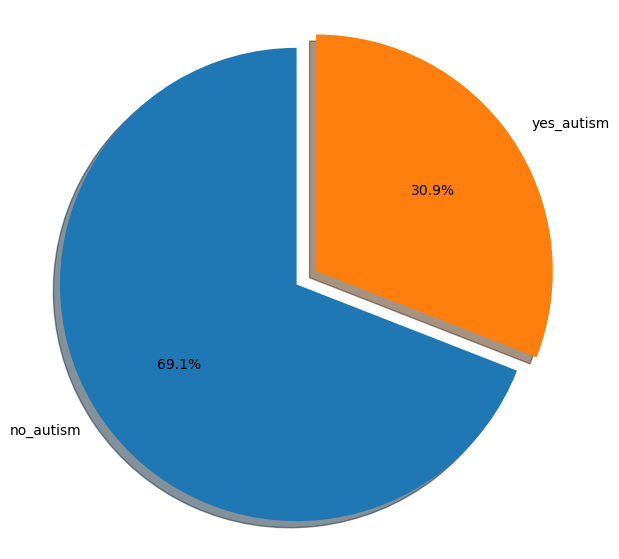

In [46]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(df["Class/ASD Traits "].value_counts(),labels=('no_autism','yes_autism'),explode = [0.1,0],autopct ='%1.1f%%' ,
        shadow = True,startangle = 90,labeldistance = 1.1)
plt.axis('equal')

plt.show()

In [47]:
# Checking null data 
df.isnull().sum()

A1                   0
A2                   0
A3                   0
A4                   0
A5                   0
A6                   0
A7                   0
A8                   0
A9                   0
A10                  0
Qchat-10-Score       0
Class/ASD Traits     0
dtype: int64

In [48]:
df.dtypes

A1                    int64
A2                    int64
A3                    int64
A4                    int64
A5                    int64
A6                    int64
A7                    int64
A8                    int64
A9                    int64
A10                   int64
Qchat-10-Score        int64
Class/ASD Traits     object
dtype: object

<Figure size 1500x1500 with 0 Axes>

<AxesSubplot:>

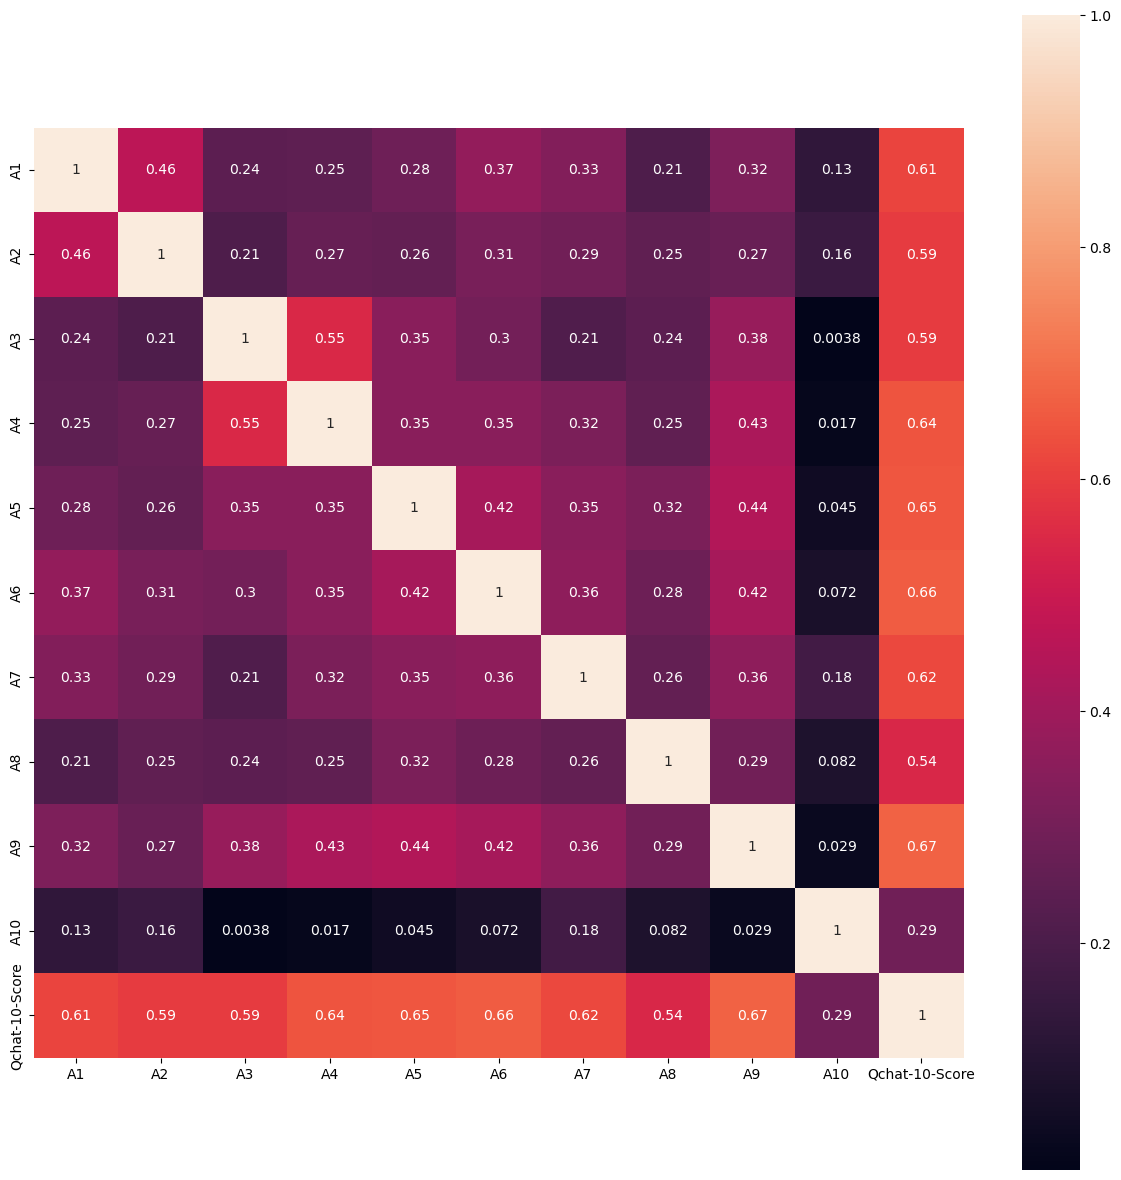

In [49]:
corr = df.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

In [50]:
# removing 'Qchat-10-Score'
df.drop('Qchat-10-Score', axis = 1, inplace = True)

In [51]:
le = LabelEncoder()
columns = ['Class/ASD Traits ']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes


A1                   int64
A2                   int64
A3                   int64
A4                   int64
A5                   int64
A6                   int64
A7                   int64
A8                   int64
A9                   int64
A10                  int64
Class/ASD Traits     int32
dtype: object

In [52]:
df.head(25)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,0
1,1,1,0,0,0,1,1,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1,1
5,1,1,0,0,1,1,1,1,1,1,1
6,1,0,0,1,1,1,0,0,1,0,1
7,0,1,0,0,1,0,1,1,1,1,1
8,0,0,0,0,0,0,1,0,0,1,0
9,1,1,1,0,1,1,0,1,1,1,1


In [53]:
X = df.drop(['Class/ASD Traits '], axis = 1)
y = df['Class/ASD Traits ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state =42)
X.isnull().sum()
X.info()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      1054 non-null   int64
 1   A2      1054 non-null   int64
 2   A3      1054 non-null   int64
 3   A4      1054 non-null   int64
 4   A5      1054 non-null   int64
 5   A6      1054 non-null   int64
 6   A7      1054 non-null   int64
 7   A8      1054 non-null   int64
 8   A9      1054 non-null   int64
 9   A10     1054 non-null   int64
dtypes: int64(10)
memory usage: 82.5 KB


In [54]:


models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))

for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', round(accuracy_score(y_test, y_hat_test)))

    #metrics(name, y_train, y_test, y_hat_train, y_hat_test)


    
    

LinearDiscriminantAnalysis()

LDA Accuracy Score is :  1


KNeighborsClassifier()

KNN Accuracy Score is :  1


GaussianNB()

NB Accuracy Score is :  1


SVC()

SVM Accuracy Score is :  1


RandomForestRegressor()

RF Accuracy Score is :  1


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGB Accuracy Score is :  1


GradientBoostingRegressor()

GBR Accuracy Score is :  1


In [55]:
for name, model in models:
    
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ',round( accuracy_score(y_test, y_hat_test),2))

LDA Accuracy Score is :  0.96
KNN Accuracy Score is :  0.95
NB Accuracy Score is :  0.94
SVM Accuracy Score is :  1.0
RF Accuracy Score is :  0.79
XGB Accuracy Score is :  0.99
GBR Accuracy Score is :  0.59


In [56]:
svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(X_train, y_train)
clf.best_params_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.2, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1.3, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END .......................C=1.3, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.4, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.4, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.4, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.4, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.4, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.4, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.4, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=1.4, kernel=rbf; total time=   0.0s


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

SVC(C=0.8, gamma=0.1, kernel='linear')

Model: SVC(C=0.8, gamma=0.1, kernel='linear')
------------------------------------------------------------


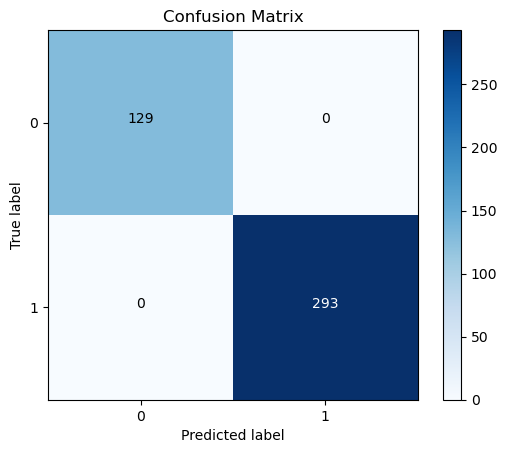

test accuracy: 1.0
train accuracy: 0.63
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       197
           1       1.00      0.47      0.64       435

    accuracy                           0.63       632
   macro avg       0.73      0.73      0.63       632
weigh

1.0

In [57]:
# Re-running model with best parametres
from sklearn.svm import SVC
svc1 = SVC(C = 0.8, gamma = 0.1, kernel = 'linear')
svc1.fit(X_train, y_train)
y_hat_test = svc1.predict(X_test)
#print(accuracy_score(y_test, y_hat_test))
metrics(svc1, y_train, y_test, y_hat_train, y_hat_test)
svcgrid_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

svcgrid_test_acc

In [58]:

#Instantiate the pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])

In [59]:
grid = [{'classifier__criterion': ['gini', 'entropy'],
         'classifier__n_estimators':[10, 20, 50, 100],
         'classifier__max_depth': [None, 5, 3, 10],
         'classifier__min_samples_split': [1.0, 6, 10],
         'classifier__min_samples_leaf': [1,  6, 10],
         'classifier__class_weight':['balanced']}]

In [ ]:
clf = GridSearchCV(estimator=pipe, param_grid=grid,
                   cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

In [ ]:

metrics(clf, y_train, y_test, y_hat_train, y_hat_test)


In [ ]:
print(round(clf.score(X_train, y_train)))
print(round(clf.score(X_test, y_test)))

In [ ]:
clf.best_params_

In [ ]:
# Research best estimator from grid
best_clf_estimator = clf.best_estimator_
best_clf_estimator.fit(X_train,y_train)

In [ ]:
#Predictions
y_hat_train=best_clf_estimator.predict(X_train)
y_hat_test = best_clf_estimator.predict(X_test)
results=metrics(best_clf_estimator, y_train, y_test, y_hat_train, y_hat_test)
rf_gridsearch_test_acc = round(accuracy_score(y_test,y_hat_test), 2)
rf_gridsearch_test_acc

In [ ]:
plot_feature_importances(model)

In [ ]:
# Neural Network Classifier Using SKLearn
##Applying MLPClassifier Model 
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)
#Calculating Prediction
y_hat_test = MLPClassifierModel.predict(X_test)
y_hat_train = MLPClassifierModel.predict(X_train)

results=metrics(MLPClassifierModel, y_train, y_test, y_hat_train, y_hat_test)

#Calculating Accuracy Score  
nn_sklearn_test_acc = round(accuracy_score(y_test, y_hat_test, normalize=True),2)

print('Accuracy Score is : ', nn_sklearn_test_acc)


In [ ]:
# collecting the summary of our neural network paramters
model.summary()


In [ ]:
#structure of keras neuralnetwork model
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model)
# looking at the structure of my neural network

In [ ]:
def evaluate_clf(y_true, y_pred):
    """Return confusion matrix, classification report, and accuracy score
    for a classifier.
    
    Parameters
    ----------
    y_true : array-like
        Target class labels
    y_pred : array-like
        Predicted class labels
        
    Returns
    ----------
    Confusion matrix, classification report, accuracy score
    """
    
    test_acc = round(accuracy_score(y_true, y_pred), 2)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('---'*20)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('---'*20)
    print("kerasNN_test_acc:",round(accuracy_score(y_test,y_hat_test), 2))
    print("kerasNN_train_acc:" ,round(accuracy_score(y_train,y_hat_train), 2))


In [ ]:
# Create classifier summary table

LogisticRegression_Accuracy =  1.0
LinearDiscriminantAnalysis_accuracy  =  0.96
KNeighborsClassifier_accuracy =  0.91
DecisionTreeClassifier_accuracy =  0.91
GaussianNB_accuracy =  0.94
SVC_beforegrid_accuracy =  0.78
RandomForest_beforegrid_accuracy =  0.64
XGBClassifier_accuracy=  0.99
GradientBoosting_accuracy =  0.64,
AdaBoosting_accuracy = 0.49
SVC_aftergrid_accuracy = 1.0
RandomForest_aftergrid_accuracy =0.98
Neuralnetwork_SKLearn_accuracy= 0.99
Neuralnetwork_Keras_accuracy = 0.95



models=['LogisticRegression','LinearDiscriminantAnalysis',
       'KNeighborsClassifier','DecisionTreeClassifier',
        'GaussianNB','SVC_beforegrid',
        'RandomForest_beforegrid','XGBClassifier',
        'GradientBoosting','AdaBoosting','SVC_aftergrid','RandomForest_aftergrid','Neuralnetwork_SKLearn Accuracy','Neuralnetwork_Keras']


test_Accuracy=[1.0,0.96,0.91,0.91,0.94, 0.78,0.64, 0.99,0.64,0.49,1.0,0.96,0.99,0.95]




accuracy_summary = pd.DataFrame([models, test_Accuracy]).T
accuracy_summary.columns = ['Classifier', 'test_Accuracy']


In [ ]:
accuracy_summary

In [ ]:
import pickle

# Save trained model to file
pickle.dump(best_clf_estimator, open("autism.pkl", "wb"))

#import pickle
#with open('autism_new.pkl', 'wb') as file:
 #   pickle.dump(model, file)


In [ ]:
#loaded_model = pickle.load(open('autism_new.pkl', 'rb'))
loaded_model = pickle.load(open("autism.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

In [ ]:
X_test.head(2)

In [ ]:

A1 = input()
A2 = input()
A3 = input()
A4 = input()
A5 = input()
A6 = input()
A7 = input()
A8 = input()
A9 = input()
A10 = input()
#Age_Mons = input()
#Sex = input()
#Ethnicity = input()
#Jaundice = input()
#Family_mem_with_ASD = input()



In [ ]:
row_df = pd.DataFrame([pd.Series([A1,A2,A3,A4,A5,A6,A7,A8,A9,A10])])

In [ ]:
row_df


In [ ]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having austim is {prob}")

In [ ]:
r=loaded_model.predict(row_df)[0]
if r==1:
    print("Victim having austim spectram disorder")
else:
    print("Victim is not effected with austim spectram disorder")